### Proyecto 10
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

In [42]:
#Examinar los datos
import pandas as pd
import numpy as np 
from sklearn.metrics import f1_score, roc_auc_score

In [3]:
#Leer el dataset
df = pd.read_csv('Churn.csv')


In [4]:
#Mostrar informacion
def info_data(datos):
    print('Primeras Filas')
    print(datos.head())
    print('Informacion General')
    print(datos.info())
    print('Datos nulos')
    print(datos.isna().sum())
    print('Datos Duplicados')
    print(datos.duplicated().sum())

In [5]:
#Visualizacion de datos
info_data(df)

Primeras Filas
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0 

## Observaciones
La columna Tenure tiene 909 datos faltantes por lo cual se los va rellenar con la mediana ya que representan un gran porcentaje de datos faltantes. Hay columnas que se deben eliminar paea entrenar el modelo porque los datos no son relevantes para el entrenar el modelo. 

In [7]:
#Preprocesamiento de datos
data_clean=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
#Rellenar la columna Tenure
data_clean['Tenure']= data_clean['Tenure'].fillna(data_clean['Tenure'].median())

In [9]:
#Convertir variables categoricas en numericas One_Hot_Encoding
data_clean = pd.get_dummies(data_clean, drop_first=True, dtype=int)

In [10]:
data_clean.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Segmentacion de Datos

In [12]:
#Importar todas las herramientas de la libreria que se va utilizar
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [13]:
# Dividir los datos en conjunto de entrenamiento, conjunto de validación, conjunto de prueba.
train_valid, test = train_test_split(data_clean, test_size=0.2)
train, valid = train_test_split(train_valid, test_size=0.25)

In [14]:
#Separar los atributos de las caracteristicas
features_train = train.drop(columns=['Exited'], axis=1)
target_train = train['Exited']
features_valid = valid.drop(columns=['Exited'], axis=1)
target_valid = valid['Exited']
features_test = test.drop(columns=['Exited'], axis=1)
target_test = test['Exited']

In [15]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


In [16]:
#Definir las variables a escalar
columns_numeric =['CreditScore','Age','Tenure','Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'] 
#Definir y ajustar un modelo de escalonamiento
scaler= StandardScaler()
#Estandarizar los valores
features_train[columns_numeric]=scaler.fit_transform(features_train[columns_numeric])
features_valid[columns_numeric]=scaler.fit_transform(features_valid[columns_numeric])
features_test[columns_numeric]=scaler.fit_transform(features_test[columns_numeric])

In [17]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8038,-0.387922,1.050621,0.003806,0.396818,0.809253,0.642207,-1.034598,-1.511288,1,0,0
1501,0.106056,-0.750444,0.728755,1.083474,0.809253,0.642207,0.966559,-1.476558,0,0,0
7888,-0.583455,-0.750444,-1.808567,0.046413,-0.911342,0.642207,-1.034598,-0.367714,0,0,0
5758,0.311880,0.481864,-0.358669,0.234795,0.809253,-1.557131,-1.034598,-1.307566,1,0,0
8765,0.250133,0.007899,-1.446092,-1.222944,0.809253,0.642207,-1.034598,0.934299,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3373,-0.068894,-0.181686,-1.083618,1.758392,0.809253,0.642207,-1.034598,-0.114629,0,0,1
9596,-1.231800,-0.181686,0.728755,0.726576,-0.911342,0.642207,-1.034598,0.836781,0,0,1
6475,-1.581701,0.197485,0.003806,0.065641,-0.911342,-1.557131,-1.034598,-0.185587,1,0,1
4427,1.238088,-1.508787,0.728755,1.274842,-0.911342,0.642207,-1.034598,-0.459274,0,0,0


<Axes: xlabel='Exited'>

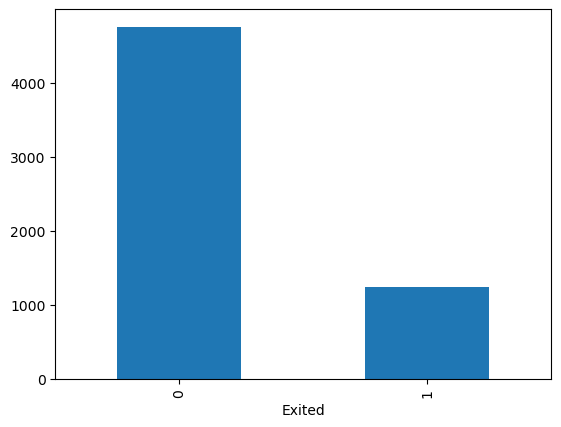

In [18]:
#Comprobar el balanceo de clases
target_train.value_counts().plot(kind='bar')

In [19]:
# Importar la funcion shuffle
from sklearn.utils import shuffle

In [20]:
#Crear una funcion de sobremostreo para balancear las clases
def sobremuestreo(caracteristicas, objetivo, repeticion):
    caracteristicas_0 = caracteristicas[objetivo == 0]
    caracteristicas_1 = caracteristicas[objetivo == 1]
    objetivo_0 = objetivo[objetivo == 0]
    objetivo_1 = objetivo[objetivo == 1]
    
    caracteristicas_upsample = pd.concat([caracteristicas_0] + [caracteristicas_1] * repeticion)
    objetivo_upsample = pd.concat([objetivo_0] + [objetivo_1] * repeticion)
    
    caracteristicas_upsample, objetivo_upsample = shuffle(caracteristicas_upsample, objetivo_upsample, random_state= 12345)
    
    return caracteristicas_upsample, objetivo_upsample



In [21]:
features_upsample, target_upsample = sobremuestreo(features_train, target_train, 4)

<Axes: xlabel='Exited'>

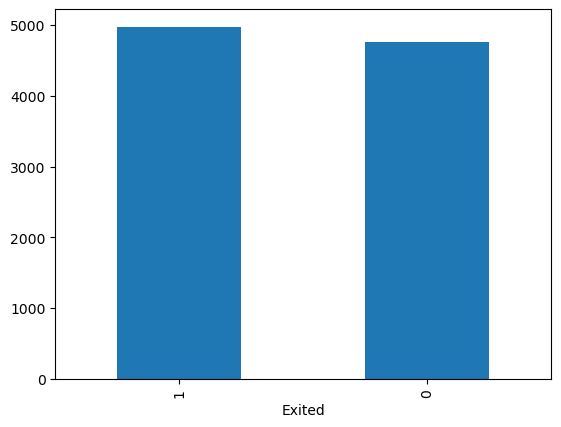

In [22]:
target_upsample.value_counts().plot(kind='bar')

In [23]:
#Crear una funcion para el submuestreo
def submuestreo(caracteristicas, objetivo, fraccion):
    caracteristicas_0 = caracteristicas[objetivo == 0]
    caracteristicas_1 = caracteristicas[objetivo == 1]
    objetivo_0 = objetivo[objetivo == 0]
    objetivo_1 = objetivo[objetivo == 1]
    caracteristicas_sub = pd.concat([caracteristicas_0.sample(frac=fraccion, random_state=12345)] + [caracteristicas_1])
    objetivo_sub= pd.concat([objetivo_0.sample(frac=fraccion, random_state=12345)] + [objetivo_1])
    return caracteristicas_sub, objetivo_sub
    

In [24]:
features_dowsample, target_dowsample = submuestreo(features_train, target_train,0.25) 

<Axes: xlabel='Exited'>

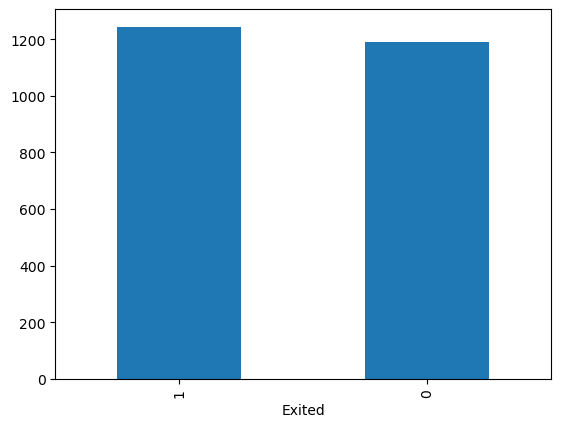

In [25]:
target_dowsample.value_counts().plot(kind='bar')

In [26]:
# Probar diferentes tipos de modelos
#Llamar libreria e importar el modelo de Bosque
from sklearn.ensemble import RandomForestClassifier 

In [27]:
# Probar modelo sin balancear  
mejor_f1 = 0
mejor_auc_roc = 0
mejores_parametros_f1 = None
mejores_parametros_auc = None

for arboles in range(10, 101, 20):
    for ramas in range(1, 20, 5):
        modelo_bosque = RandomForestClassifier(n_estimators=arboles, max_depth=ramas, random_state=42)
        modelo_bosque.fit(features_train, target_train)
        prediccion_valid = modelo_bosque.predict(features_valid)
        probabilidades_valid = modelo_bosque.predict_proba(features_valid)[:, 1]

        # Métricas
        f1 = f1_score(target_valid, prediccion_valid)
        auc_roc = roc_auc_score(target_valid, probabilidades_valid)

        # Verificar si es el mejor puntaje
        if f1 > mejor_f1:
            mejor_f1 = f1
            mejores_parametros_f1 = {'Árboles': arboles, 'Ramas': ramas}
        if auc_roc > mejor_auc_roc:
            mejor_auc_roc = auc_roc
            mejores_parametros_auc = {'Árboles': arboles, 'Ramas': ramas}

print(f"Mejor F1-Score: {mejor_f1} con parámetros {mejores_parametros_f1}")
print(f"Mejor AUC-ROC: {mejor_auc_roc} con parámetros {mejores_parametros_auc}")

Mejor F1-Score: 0.5958083832335329 con parámetros {'Árboles': 90, 'Ramas': 11}
Mejor AUC-ROC: 0.8625540727105384 con parámetros {'Árboles': 90, 'Ramas': 11}


In [28]:
#Probar modelo del Bosque con los mejores valores sin balanceo 
modelo_bosque_desbalanceado= RandomForestClassifier(n_estimators=90, max_depth=11)
modelo_bosque_desbalanceado.fit(features_train, target_train)

RandomForestClassifier(max_depth=11, n_estimators=90)

In [29]:
#Probar un modelo de Bosque con sobreajuste
mejor_f1 = 0
mejor_auc_roc = 0
mejores_parametros_f1 = None
mejores_parametros_auc = None

for arboles in range(10, 101, 20):
    for ramas in range(1, 20, 5):
        modelo_bosque = RandomForestClassifier(n_estimators=arboles, max_depth=ramas, random_state=42)
        modelo_bosque.fit(features_upsample, target_upsample)
        prediccion_valid = modelo_bosque.predict(features_upsample)
        probabilidades_valid = modelo_bosque.predict_proba(features_upsample)[:, 1]

        # Métricas
        f1 = f1_score(target_upsample, prediccion_valid)
        auc_roc = roc_auc_score(target_upsample, probabilidades_valid)

        # Verificar si es el mejor puntaje
        if f1 > mejor_f1:
            mejor_f1 = f1
            mejores_parametros_f1 = {'Árboles': arboles, 'Ramas': ramas}
        if auc_roc > mejor_auc_roc:
            mejor_auc_roc = auc_roc
            mejores_parametros_auc = {'Árboles': arboles, 'Ramas': ramas}

print(f"Mejor F1-Score: {mejor_f1} con parámetros {mejores_parametros_f1}")
print(f"Mejor AUC-ROC: {mejor_auc_roc} con parámetros {mejores_parametros_auc}")

Mejor F1-Score: 0.9990964762574038 con parámetros {'Árboles': 70, 'Ramas': 16}
Mejor AUC-ROC: 1.0 con parámetros {'Árboles': 70, 'Ramas': 16}


In [30]:
#Entrenar el modelo del Bosque con los mejores valores con sobreajuste 
modelo_bosque_sobreajustado= RandomForestClassifier(n_estimators=50, max_depth=16,class_weight='balanced')
modelo_bosque_sobreajustado.fit(features_upsample, target_upsample)

RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=50)

In [31]:
# Modelo de balanceado con subajuste
mejor_f1 = 0
mejor_auc_roc = 0
mejores_parametros_f1 = None
mejores_parametros_auc = None

for arboles in range(10, 101, 20):
    for ramas in range(1, 20, 5):
        modelo_bosque = RandomForestClassifier(n_estimators=arboles, max_depth=ramas, random_state=42)
        modelo_bosque.fit(features_dowsample, target_dowsample)
        prediccion_valid = modelo_bosque.predict(features_dowsample)
        probabilidades_valid = modelo_bosque.predict_proba(features_dowsample)[:, 1]

        # Métricas
        f1 = f1_score(target_dowsample, prediccion_valid)
        auc_roc = roc_auc_score(target_dowsample, probabilidades_valid)

        # Verificar si es el mejor puntaje
        if f1 > mejor_f1:
            mejor_f1 = f1
            mejores_parametros_f1 = {'Árboles': arboles, 'Ramas': ramas}
        if auc_roc > mejor_auc_roc:
            mejor_auc_roc = auc_roc
            mejores_parametros_auc = {'Árboles': arboles, 'Ramas': ramas}

print(f"Mejor F1-Score: {mejor_f1} con parámetros {mejores_parametros_f1}")
print(f"Mejor AUC-ROC: {mejor_auc_roc} con parámetros {mejores_parametros_auc}")

Mejor F1-Score: 1.0 con parámetros {'Árboles': 70, 'Ramas': 16}
Mejor AUC-ROC: 1.0 con parámetros {'Árboles': 50, 'Ramas': 16}


In [32]:
#Entrenar el modelo del Bosque con los mejores valores con subajuste
modelo_bosque_subajustado= RandomForestClassifier(n_estimators=90, max_depth=16, class_weight='balanced')
modelo_bosque_subajustado.fit(features_dowsample, target_dowsample)

RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=90)

In [33]:
#Realizar las prediciones con el modelo sin balanceo 
prediccion_valid = modelo_bosque_desbalanceado.predict(features_test)
probabilidades_valid = modelo_bosque_desbalanceado.predict_proba(features_test)[:, 1]
#Evaluar el modelo 
print('Score del modelo sin balanceo')
print('Valid F1: ',f1_score(target_test, prediccion_valid))
print('Valid AUC-ROC:',roc_auc_score(target_test, probabilidades_valid))

Score del modelo sin balanceo
Valid F1:  0.5652892561983471
Valid AUC-ROC: 0.8525990980299073


In [34]:
#Realizar las prediciones con el modelo sobreajustado
prediccion_valid = modelo_bosque_sobreajustado.predict(features_test)
probabilidades_valid = modelo_bosque_sobreajustado.predict_proba(features_test)[:, 1]
#Evaluar el modelo 
print('Score del modelo con sobremuestreo')
print('Valid F1: ',f1_score(target_test, prediccion_valid))
print('Valid AUC-ROC:',roc_auc_score(target_test, probabilidades_valid))

Score del modelo con sobremuestreo
Valid F1:  0.5871313672922251
Valid AUC-ROC: 0.8460337374921485


In [35]:
#Realizar las prediciones con el modelo subajustado 
prediccion_valid = modelo_bosque_subajustado.predict(features_test)
probabilidades_valid = modelo_bosque_subajustado.predict_proba(features_test)[:, 1]
#Evaluar el modelo 
print('Score del modelo con submuestreo')
print('Valid F1: ',f1_score(target_test, prediccion_valid))
print('Valid AUC-ROC:',roc_auc_score(target_test, probabilidades_valid))

Score del modelo con submuestreo
Valid F1:  0.5519176800748363
Valid AUC-ROC: 0.8435325708731154


### Observaciones
EL sobremuestreo es el que tiene mejor F1:  0.59 con un  AUC-ROC: 0.8 es el mas optimo para entrenar el modelo de bosque


In [50]:
# Probar el modelo con Regresion Logistica
# Crear un modelo de regresión logística con class_weight='balanced'

model_regresion = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')
model_regresion.fit(features_train,target_train)

# Realizar predicciones
predictions = model_regresion.predict(features_test)
probabilidades = model_regresion.predict_proba(features_test)[:, 1]

#Evaluar el modelo 
print('Score del modelo de regresion')
print('Valid F1: ',f1_score(target_test, predictions))
print('Valid AUC-ROC:',roc_auc_score(target_test, probabilidades))

Score del modelo de regresion
Valid F1:  0.47920433996383366
Valid AUC-ROC: 0.7659221295924019


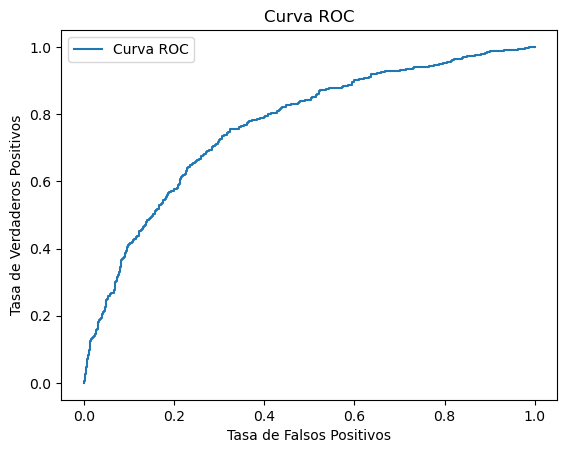

In [52]:
#Comprobar la curva ROC en el modelo de regresion
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_test, probabilidades)
plt.plot(fpr, tpr, label="Curva ROC")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## Conclusiones
El modelo de bosque sin balancear tendria los mejores valores en F1 score y curva ROC, pero el sobreajustado es el valor mas optimo ya que el proyecto dispone de almenos un 0.59 de F1 score, probando el modelo balanceado con regresion logistica no es tan conveniente para predecir si los clientes van o no a terminar sus contratos en base a todos los datos que se analizaron los cuales se balancearon para que el modelo pueda tener la misma efectividad al predecir los usuario que se van como los que se quedan. 